In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [342]:
ds=pd.read_csv('delhivery_data.csv');
ds.head()


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [343]:
print(ds.info())
print(ds.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [344]:
ds_nulls=ds.isna()
ds_nulls.sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

Data cleaning

In [345]:
ds_cleaned=ds[~ds['source_name'].isna() & ~ds['destination_name'].isna()]
ds_nulls=ds_cleaned.isna()
ds_nulls.sum()


data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [346]:
print(ds_cleaned.info())
print(ds_cleaned.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  is_cutoff            

In [347]:
# analysing time cols
fullcols=['trip_uuid','trip_creation_time','route_type','source_center','source_name','destination_center','destination_name','od_start_time',
          'od_end_time','start_scan_to_end_scan','actual_time','osrm_time',
	'segment_actual_time','segment_osrm_time','actual_distance_to_destination','osrm_distance','segment_osrm_distance'];

timecols=['trip_uuid','source_center','destination_center','source_name','destination_name','od_start_time','od_end_time','start_scan_to_end_scan','actual_time','osrm_time',
	'segment_actual_time','segment_osrm_time'];

ds_fullcols=ds_cleaned[fullcols];
ds_fullcols['computed_interval_min']=pd.to_datetime(ds_fullcols['od_end_time'])-pd.to_datetime(ds_fullcols['od_start_time']);

ds_fullcols['computed_interval_min']=ds_fullcols['computed_interval_min'].apply(lambda x: x.total_seconds()/60)
#ds_fullcols=ds_fullcols[['trip_uuid','source_center','source_name','destination_center','destination_name','computed_interval_min','start_scan_to_end_scan','actual_time','osrm_time',
#	'segment_actual_time','segment_osrm_time']];
ds_fullcols.info()

/tmp/ipykernel_19103/3935150691.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_fullcols['computed_interval_min']=pd.to_datetime(ds_fullcols['od_end_time'])-pd.to_datetime(ds_fullcols['od_start_time']);


<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   trip_uuid                       144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_type                      144316 non-null  object 
 3   source_center                   144316 non-null  object 
 4   source_name                     144316 non-null  object 
 5   destination_center              144316 non-null  object 
 6   destination_name                144316 non-null  object 
 7   od_start_time                   144316 non-null  object 
 8   od_end_time                     144316 non-null  object 
 9   start_scan_to_end_scan          144316 non-null  float64
 10  actual_time                     144316 non-null  float64
 11  osrm_time                       144316 non-null  float64
 12  segment_actual_time  

/tmp/ipykernel_19103/3935150691.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_fullcols['computed_interval_min']=ds_fullcols['computed_interval_min'].apply(lambda x: x.total_seconds()/60)


In [348]:
#ds_fullcols.head(30)
#[['trip_creation_time','route_type','source_center','source_name','destination_center','destination_name',
 #                                                       'computed_interval_min','start_scan_to_end_scan','actual_time',
#'osrm_time','segment_actual_time','segment_osrm_time']]

ds_fullcols_processed=ds_fullcols.groupby('trip_uuid').agg(trip_creation_time=("trip_creation_time",'first'),
                                                            route_type=('route_type','first'),
                                                            StartPoint=("source_center","first"),
                                                            StartName=("source_name","first"),
                                                            EndPoint=("destination_center","last"),
                                                            EndName=("destination_name","last"),
                                                            computed_min=('computed_interval_min','first'),
                                                           start_scan_to_end_scan=('start_scan_to_end_scan','first'),
                                                          agg_actual_time=('actual_time','last'),
                                                          agg_osrm_time=('osrm_time','last'),
                                                          agg_segment_actual_time=('segment_actual_time','sum'),
                                                          agg_segment_osrm_time=('segment_osrm_time','sum'),
                                                           agg_osrm_distance=('osrm_distance','last'),
                                                           agg_segment_osrm_distance=('segment_osrm_distance','sum'))

print(ds_fullcols_processed.shape)
print(ds_fullcols_processed.columns)

(14787, 14)
Index(['trip_creation_time', 'route_type', 'StartPoint', 'StartName',
       'EndPoint', 'EndName', 'computed_min', 'start_scan_to_end_scan',
       'agg_actual_time', 'agg_osrm_time', 'agg_segment_actual_time',
       'agg_segment_osrm_time', 'agg_osrm_distance',
       'agg_segment_osrm_distance'],
      dtype='object')


3. Feature Engineering

In [349]:
def strsplitter(s):
  ls=s.split('(')
  ls[-1]=ls[-1].rstrip(')')
  ls2=ls[0].split('_',2)
  if len(ls2)==1:
    ls2=ls2[0].split(' ',2)

  ls2.append(ls[-1])
  return ls2

ds_fullcols_processed['StartName']=ds_fullcols_processed['StartName'].apply(strsplitter)
ds_fullcols_processed['EndName']=ds_fullcols_processed['EndName'].apply(strsplitter)

split_source = pd.DataFrame(ds_fullcols_processed['StartName'].to_list(), 
                            columns = ['s_place', 's_area','s_code','s_state'],
                            index=ds_fullcols_processed.index);
split_dest = pd.DataFrame(ds_fullcols_processed['EndName'].to_list(), 
                          columns = ['d_place', 'd_area','d_code','d_state'],
                         index=ds_fullcols_processed.index);


ds_fullcols_processed = pd.concat([ds_fullcols_processed, split_source], axis=1)
ds_fullcols_processed = pd.concat([ds_fullcols_processed, split_dest], axis=1)

ds_fullcols_processed=ds_fullcols_processed.drop(['StartName','EndName'],axis=1)

#print(split_source.head())
print(ds_fullcols_processed.shape)
print(ds_fullcols_processed.columns)

(14787, 20)
Index(['trip_creation_time', 'route_type', 'StartPoint', 'EndPoint',
       'computed_min', 'start_scan_to_end_scan', 'agg_actual_time',
       'agg_osrm_time', 'agg_segment_actual_time', 'agg_segment_osrm_time',
       'agg_osrm_distance', 'agg_segment_osrm_distance', 's_place', 's_area',
       's_code', 's_state', 'd_place', 'd_area', 'd_code', 'd_state'],
      dtype='object')


In [350]:
ds_fullcols_processed.head()

,trip_creation_time,route_type,StartPoint,EndPoint,computed_min,start_scan_to_end_scan,agg_actual_time,agg_osrm_time,agg_segment_actual_time,agg_segment_osrm_time,agg_osrm_distance,agg_segment_osrm_distance,s_place,s_area,s_code,s_state,d_place,d_area,d_code,d_state
trip_uuid,,,,,,,,,,,,,,,,,,,,
trip-153671041653548748,2018-09-12 00:00:16.535741,FTL,IND462022AAA,IND000000ACB,999.505379,999.0,732.0,329.0,1548.0,1008.0,446.5496,1320.4733,Bhopal,Trnsport,H,Madhya Pradesh,Gurgaon,Bilaspur,HB,Haryana
trip-153671042288605164,2018-09-12 00:00:22.886430,Carting,IND572101AAA,IND562101AAA,122.779486,122.0,47.0,26.0,141.0,65.0,28.1994,84.1894,Tumkur,Veersagr,I,Karnataka,Chikblapur,ShntiSgr,D,Karnataka
trip-153671043369099517,2018-09-12 00:00:33.691250,FTL,IND562132AAA,IND160002AAC,3099.723591,3099.0,611.0,212.0,3308.0,1941.0,281.2109,2545.2678,Bangalore,Nelmngla,H,Karnataka,Chandigarh,Mehmdpur,H,Punjab
trip-153671046011330457,2018-09-12 00:01:00.113710,Carting,IND400072AAB,IND401104AAA,100.494935,100.0,59.0,15.0,59.0,16.0,19.6800,19.8766,Mumbai,Hub,,Maharashtra,Mumbai,MiraRd,IP,Maharashtra
trip-153671052974046625,2018-09-12 00:02:09.740725,FTL,IND583101AAA,IND583101AAA,152.012914,152.0,131.0,44.0,340.0,115.0,53.5761,146.7919,Bellary,Dc,Karnataka,None,Bellary,Dc,Karnataka,None


In [351]:
ds_fullcols_processed[['s_place','d_place']]=ds_fullcols_processed[['s_place','d_place']].replace('Bengaluru','Bangalore')

ds_fullcols_processed.head()
print(ds_fullcols_processed.shape)

(14787, 20)


In [352]:
ds_fullcols_processed['trip_creation_time']=pd.to_datetime(ds_fullcols_processed['trip_creation_time'])
ds_fullcols_processed['trip_year']=ds_fullcols_processed['trip_creation_time'].dt.year
ds_fullcols_processed['trip_month']=ds_fullcols_processed['trip_creation_time'].dt.month
ds_fullcols_processed['trip_day']=ds_fullcols_processed['trip_creation_time'].dt.day
ds_fullcols_processed=ds_fullcols_processed.drop('trip_creation_time',axis=1)

#ds_fullcols_processed[['trip_year','trip_month','trip_day']].value_counts()
print(ds_fullcols_processed.shape)


(14787, 22)


In [353]:
print(ds_fullcols_processed.head())

                        route_type    StartPoint      EndPoint  computed_min  \
trip_uuid                                                                      
trip-153671041653548748        FTL  IND462022AAA  IND000000ACB    999.505379   
trip-153671042288605164    Carting  IND572101AAA  IND562101AAA    122.779486   
trip-153671043369099517        FTL  IND562132AAA  IND160002AAC   3099.723591   
trip-153671046011330457    Carting  IND400072AAB  IND401104AAA    100.494935   
trip-153671052974046625        FTL  IND583101AAA  IND583101AAA    152.012914   

                         start_scan_to_end_scan  agg_actual_time  \
trip_uuid                                                          
trip-153671041653548748                   999.0            732.0   
trip-153671042288605164                   122.0             47.0   
trip-153671043369099517                  3099.0            611.0   
trip-153671046011330457                   100.0             59.0   
trip-153671052974046625        

4. In-depth analysis 

In [354]:
summ_stats=ds_fullcols_processed.describe()
print(summ_stats)

       computed_min  start_scan_to_end_scan  agg_actual_time  agg_osrm_time  \
count  14787.000000            14787.000000     14787.000000   14787.000000   
mean     336.957663              336.458173       251.134375     108.303645   
std      497.941579              497.942925       455.202399     218.447496   
min       22.996359               22.000000         9.000000       6.000000   
25%      108.657106              108.000000        56.000000      24.000000   
50%      177.950340              177.000000        98.000000      41.000000   
75%      333.132462              333.000000       213.000000      82.000000   
max     7898.551955             7898.000000      4532.000000    1686.000000   

       agg_segment_actual_time  agg_segment_osrm_time  agg_osrm_distance  \
count             14787.000000           14787.000000       14787.000000   
mean                353.059174             180.511598         138.288962   
std                 556.365911             314.679279       

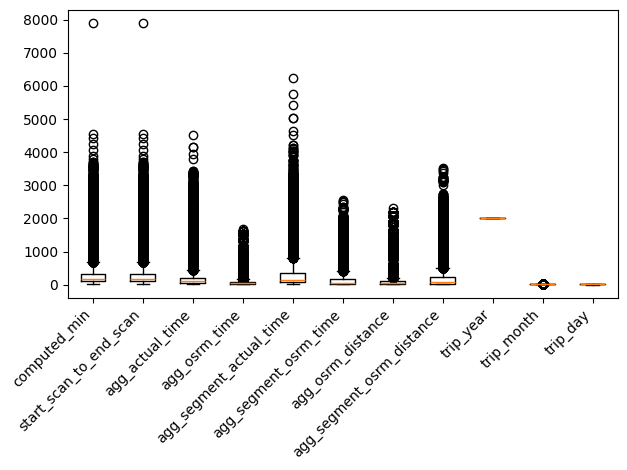

In [355]:
'''
numericalcols=['computed_min','start_scan_to_end_scan','agg_actual_time','agg_osrm_time',
               'agg_segment_actual_time','agg_segment_osrm_time','agg_osrm_distance','agg_segment_osrm_distance',
              'trip_year','trip_month','trip_day'];
'''
fig, ax = plt.subplots()
ax.boxplot(ds_fullcols_processed[summ_stats.columns])
ax.set_xticklabels(summ_stats.columns)
#ax.text(left, bottom, 'left bottom',rotation=60)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [356]:
# removing outliers through IQR method i.e remove data points that are over Q3+1.5IQR and below Q1-1.5IQR are outliers
summ_stats=summ_stats.T
print(summ_stats)

                             count         mean         std          min  \
computed_min               14787.0   336.957663  497.941579    22.996359   
start_scan_to_end_scan     14787.0   336.458173  497.942925    22.000000   
agg_actual_time            14787.0   251.134375  455.202399     9.000000   
agg_osrm_time              14787.0   108.303645  218.447496     6.000000   
agg_segment_actual_time    14787.0   353.059174  556.365911     9.000000   
agg_segment_osrm_time      14787.0   180.511598  314.679279     6.000000   
agg_osrm_distance          14787.0   138.288962  300.259409     9.072900   
agg_segment_osrm_distance  14787.0   222.705466  416.846279     9.072900   
trip_year                  14787.0  2018.000000    0.000000  2018.000000   
trip_month                 14787.0     9.120105    0.325096     9.000000   
trip_day                   14787.0    18.375127    7.882198     1.000000   

                                   25%         50%          75%          max  
computed

In [357]:
summ_stats['iqr']=summ_stats['75%']-summ_stats['25%']
summ_stats['ub']=summ_stats['75%']+1.5*summ_stats['iqr']
summ_stats['lb']=summ_stats['25%']-1.5*summ_stats['iqr']
print(summ_stats)

                             count         mean         std          min  \
computed_min               14787.0   336.957663  497.941579    22.996359   
start_scan_to_end_scan     14787.0   336.458173  497.942925    22.000000   
agg_actual_time            14787.0   251.134375  455.202399     9.000000   
agg_osrm_time              14787.0   108.303645  218.447496     6.000000   
agg_segment_actual_time    14787.0   353.059174  556.365911     9.000000   
agg_segment_osrm_time      14787.0   180.511598  314.679279     6.000000   
agg_osrm_distance          14787.0   138.288962  300.259409     9.072900   
agg_segment_osrm_distance  14787.0   222.705466  416.846279     9.072900   
trip_year                  14787.0  2018.000000    0.000000  2018.000000   
trip_month                 14787.0     9.120105    0.325096     9.000000   
trip_day                   14787.0    18.375127    7.882198     1.000000   

                                   25%         50%          75%          max  \
compute

In [358]:
#a=ds_fullcols_processed
#print(a.describe())
#b=a[a.computed_min < summ_stats.loc['computed_min','ub']]
#print(b.describe())

numericalcols=['computed_min','start_scan_to_end_scan','agg_actual_time','agg_osrm_time',
               'agg_segment_actual_time','agg_segment_osrm_time','agg_osrm_distance','agg_segment_osrm_distance'];

for colname in numericalcols:
    ds_fullcols_processed=ds_fullcols_processed[(ds_fullcols_processed[colname]<summ_stats.loc[colname,'ub']) &
    (ds_fullcols_processed[colname]>summ_stats.loc[colname,'lb'])]

ds_forinsights=ds_fullcols_processed;

In [359]:
print(ds_fullcols_processed.shape)

(12001, 22)


In [360]:
ds_fullcols_processed.head(10)

,route_type,StartPoint,EndPoint,computed_min,start_scan_to_end_scan,agg_actual_time,agg_osrm_time,agg_segment_actual_time,agg_segment_osrm_time,agg_osrm_distance,...,s_area,s_code,s_state,d_place,d_area,d_code,d_state,trip_year,trip_month,trip_day
trip_uuid,,,,,,,,,,,,,,,,,,,,,
trip-153671042288605164,Carting,IND572101AAA,IND562101AAA,122.779486,122.0,47.0,26.0,141.0,65.0,28.1994,...,Veersagr,I,Karnataka,Chikblapur,ShntiSgr,D,Karnataka,2018,9,12
trip-153671046011330457,Carting,IND400072AAB,IND401104AAA,100.494935,100.0,59.0,15.0,59.0,16.0,19.6800,...,Hub,,Maharashtra,Mumbai,MiraRd,IP,Maharashtra,2018,9,12
trip-153671052974046625,FTL,IND583101AAA,IND583101AAA,152.012914,152.0,131.0,44.0,340.0,115.0,53.5761,...,Dc,Karnataka,None,Bellary,Dc,Karnataka,None,2018,9,12
trip-153671055416136166,Carting,IND600116AAB,IND602105AAB,129.609900,129.0,40.0,12.0,60.0,23.0,16.2225,...,Porur,DPC,Tamil Nadu,Chennai,Sriperumbudur,Dc,Tamil Nadu,2018,9,12
trip-153671066201138152,Carting,IND600044AAD,IND600048AAA,98.005634,98.0,24.0,13.0,24.0,13.0,12.0184,...,Chrompet,DPC,Tamil Nadu,Chennai,Vandalur,Dc,Tamil Nadu,2018,9,12
trip-153671066826362165,Carting,IND560043AAC,IND560043AAC,68.588279,68.0,39.0,16.0,64.0,34.0,15.0770,...,Layout,PC,Karnataka,HBR,Layout,PC,Karnataka,2018,9,12
trip-153671074033284934,Carting,IND395023AAD,IND395023AAD,116.021749,116.0,128.0,16.0,161.0,29.0,17.0225,...,Central,I_4,Gujarat,Surat,Central,I_4,Gujarat,2018,9,12
trip-153671079956500691,Carting,IND110024AAA,IND110014AAA,49.333390,49.0,23.0,8.0,23.0,14.0,9.9566,...,Lajpat,IP,Delhi,Delhi,Bhogal,Delhi,None,2018,9,12
trip-153671090980523004,Carting,IND412105AAC,IND411017AAA,72.955437,72.0,60.0,17.0,60.0,17.0,18.5886,...,North,D_3,Maharashtra,PNQ,Rahatani,DPC,Maharashtra,2018,9,12


In [361]:
# scaling the numerical cols with standard scaler
for colname in numericalcols:
    ds_fullcols_processed[colname]=(ds_fullcols_processed[colname]-summ_stats.loc[colname,'mean'])/summ_stats.loc[colname,'std']

ds_fullcols_processed.head(10)

,route_type,StartPoint,EndPoint,computed_min,start_scan_to_end_scan,agg_actual_time,agg_osrm_time,agg_segment_actual_time,agg_segment_osrm_time,agg_osrm_distance,...,s_area,s_code,s_state,d_place,d_area,d_code,d_state,trip_year,trip_month,trip_day
trip_uuid,,,,,,,,,,,,,,,,,,,,,
trip-153671042288605164,Carting,IND572101AAA,IND562101AAA,-0.430127,-0.430688,-0.448447,-0.376766,-0.381151,-0.367077,-0.366648,...,Veersagr,I,Karnataka,Chikblapur,ShntiSgr,D,Karnataka,2018,9,12
trip-153671046011330457,Carting,IND400072AAB,IND401104AAA,-0.474880,-0.474870,-0.422086,-0.427122,-0.528536,-0.522791,-0.395022,...,Hub,,Maharashtra,Mumbai,MiraRd,IP,Maharashtra,2018,9,12
trip-153671052974046625,FTL,IND583101AAA,IND583101AAA,-0.371419,-0.370440,-0.263914,-0.294367,-0.023472,-0.208185,-0.282132,...,Dc,Karnataka,None,Bellary,Dc,Karnataka,None,2018,9,12
trip-153671055416136166,Carting,IND600116AAB,IND602105AAB,-0.416410,-0.416630,-0.463825,-0.440855,-0.526738,-0.500546,-0.406537,...,Porur,DPC,Tamil Nadu,Chennai,Sriperumbudur,Dc,Tamil Nadu,2018,9,12
trip-153671066201138152,Carting,IND600044AAD,IND600048AAA,-0.479880,-0.478887,-0.498974,-0.436277,-0.591444,-0.532325,-0.420538,...,Chrompet,DPC,Tamil Nadu,Chennai,Vandalur,Dc,Tamil Nadu,2018,9,12
trip-153671066826362165,Carting,IND560043AAC,IND560043AAC,-0.538958,-0.539134,-0.466022,-0.422544,-0.519549,-0.465590,-0.410352,...,Layout,PC,Karnataka,HBR,Layout,PC,Karnataka,2018,9,12
trip-153671074033284934,Carting,IND395023AAD,IND395023AAD,-0.443698,-0.442738,-0.270505,-0.422544,-0.345203,-0.481479,-0.403872,...,Central,I_4,Gujarat,Surat,Central,I_4,Gujarat,2018,9,12
trip-153671079956500691,Carting,IND110024AAA,IND110014AAA,-0.577627,-0.577291,-0.501171,-0.459166,-0.593241,-0.529147,-0.427405,...,Lajpat,IP,Delhi,Delhi,Bhogal,Delhi,None,2018,9,12
trip-153671090980523004,Carting,IND412105AAC,IND411017AAA,-0.530187,-0.531101,-0.419889,-0.417966,-0.526738,-0.519613,-0.398656,...,North,D_3,Maharashtra,PNQ,Rahatani,DPC,Maharashtra,2018,9,12


In [362]:
ds_fullcols_processed.columns

Index(['route_type', 'StartPoint', 'EndPoint', 'computed_min',
       'start_scan_to_end_scan', 'agg_actual_time', 'agg_osrm_time',
       'agg_segment_actual_time', 'agg_segment_osrm_time', 'agg_osrm_distance',
       'agg_segment_osrm_distance', 's_place', 's_area', 's_code', 's_state',
       'd_place', 'd_area', 'd_code', 'd_state', 'trip_year', 'trip_month',
       'trip_day'],
      dtype='object')

In [363]:
ds_fullcols_processed = pd.get_dummies(ds_fullcols_processed, columns=['route_type', 's_state','d_state','trip_month'])

ignorecols=['StartPoint','EndPoint','s_place','s_area','s_code','d_place','d_area','d_code','trip_year','trip_day'];

ds_fullcols_processed=ds_fullcols_processed.drop(ignorecols,axis=1)

print(ds_fullcols_processed.shape)
ds_fullcols_processed.head(10)

(12001, 71)


,computed_min,start_scan_to_end_scan,agg_actual_time,agg_osrm_time,agg_segment_actual_time,agg_segment_osrm_time,agg_osrm_distance,agg_segment_osrm_distance,route_type_Carting,route_type_FTL,...,d_state_Punjab,d_state_Rajasthan,d_state_Tamil Nadu,d_state_Telangana,d_state_Tripura,d_state_Uttar Pradesh,d_state_Uttarakhand,d_state_West Bengal,trip_month_9,trip_month_10
trip_uuid,,,,,,,,,,,,,,,,,,,,,
trip-153671042288605164,-0.430127,-0.430688,-0.448447,-0.376766,-0.381151,-0.367077,-0.366648,-0.332295,True,False,...,False,False,False,False,False,False,False,False,True,False
trip-153671046011330457,-0.474880,-0.474870,-0.422086,-0.427122,-0.528536,-0.522791,-0.395022,-0.486580,True,False,...,False,False,False,False,False,False,False,False,True,False
trip-153671052974046625,-0.371419,-0.370440,-0.263914,-0.294367,-0.023472,-0.208185,-0.282132,-0.182114,False,True,...,False,False,False,False,False,False,False,False,True,False
trip-153671055416136166,-0.416410,-0.416630,-0.463825,-0.440855,-0.526738,-0.500546,-0.406537,-0.466937,True,False,...,False,False,True,False,False,False,False,False,True,False
trip-153671066201138152,-0.479880,-0.478887,-0.498974,-0.436277,-0.591444,-0.532325,-0.420538,-0.505431,True,False,...,False,False,True,False,False,False,False,False,True,False
trip-153671066826362165,-0.538958,-0.539134,-0.466022,-0.422544,-0.519549,-0.465590,-0.410352,-0.464884,True,False,...,False,False,False,False,False,False,False,False,True,False
trip-153671074033284934,-0.443698,-0.442738,-0.270505,-0.422544,-0.345203,-0.481479,-0.403872,-0.460049,True,False,...,False,False,False,False,False,False,False,False,True,False
trip-153671079956500691,-0.577627,-0.577291,-0.501171,-0.459166,-0.593241,-0.529147,-0.427405,-0.495673,True,False,...,False,False,False,False,False,False,False,False,True,False
trip-153671090980523004,-0.530187,-0.531101,-0.419889,-0.417966,-0.526738,-0.519613,-0.398656,-0.489669,True,False,...,False,False,False,False,False,False,False,False,True,False


5. Hypothesis testing/ visual analysis

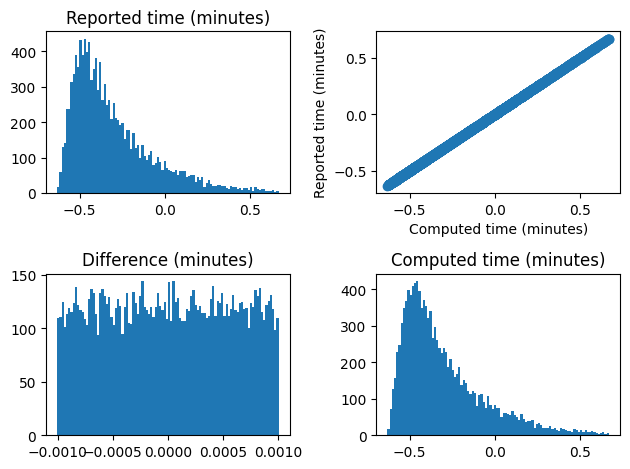

In [364]:

fig, ((ax0, ax1), (ax2,ax3)) = plt.subplots(nrows=2, ncols=2)

ax0.set_title('Reported time (minutes)')
ax0.hist(ds_fullcols_processed.start_scan_to_end_scan,bins=100)

ax1.scatter(ds_fullcols_processed.computed_min,ds_fullcols_processed.start_scan_to_end_scan)
ax1.set_xlabel('Computed time (minutes)')
ax1.set_ylabel('Reported time (minutes)')

ax2.set_title('Difference (minutes)')
ax2.hist(ds_fullcols_processed.computed_min-ds_fullcols_processed.start_scan_to_end_scan,bins=100)

ax3.set_title('Computed time (minutes)')
ax3.hist(ds_fullcols_processed.computed_min,bins=100)


plt.tight_layout()

plt.show()

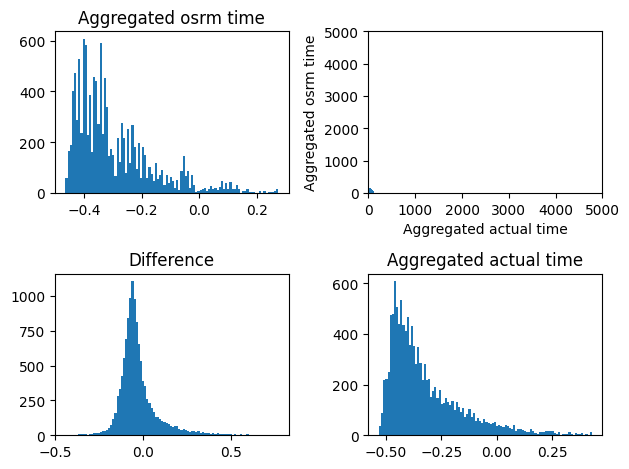

In [365]:
fig, ((ax0, ax1), (ax2,ax3)) = plt.subplots(nrows=2, ncols=2)

ax0.set_title('Aggregated osrm time')
ax0.hist(ds_fullcols_processed.agg_osrm_time,bins=100)

ax1.scatter(ds_fullcols_processed.agg_actual_time,ds_fullcols_processed.agg_osrm_time)
ax1.set_xlabel('Aggregated actual time')
ax1.set_ylabel('Aggregated osrm time')
ax1.set_ylim([0,5000])
ax1.set_xlim([0,5000])

ax2.set_title('Difference')
ax2.hist(ds_fullcols_processed.agg_actual_time-ds_fullcols_processed.agg_osrm_time,bins=100)

ax3.set_title('Aggregated actual time')
ax3.hist(ds_fullcols_processed.agg_actual_time,bins=100)


plt.tight_layout()

plt.show()

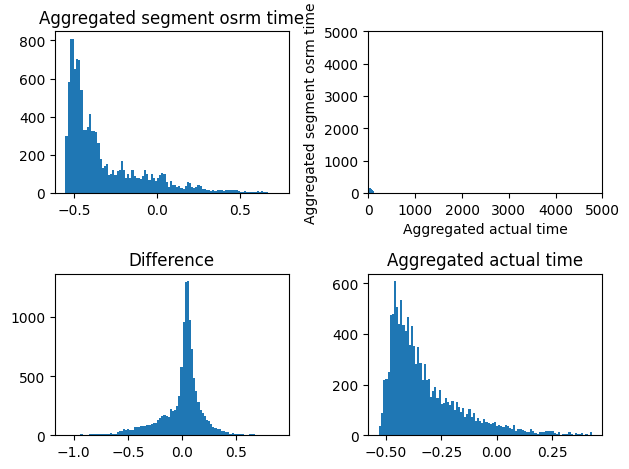

In [366]:
fig, ((ax0, ax1), (ax2,ax3)) = plt.subplots(nrows=2, ncols=2)

ax0.set_title('Aggregated segment osrm time')
ax0.hist(ds_fullcols_processed.agg_segment_osrm_time,bins=100)

ax1.scatter(ds_fullcols_processed.agg_actual_time,ds_fullcols_processed.agg_segment_osrm_time)
ax1.set_xlabel('Aggregated actual time')
ax1.set_ylabel('Aggregated segment osrm time')
ax1.set_ylim([0,5000])
ax1.set_xlim([0,5000])

ax2.set_title('Difference')
ax2.hist(ds_fullcols_processed.agg_actual_time-ds_fullcols_processed.agg_segment_osrm_time,bins=100)

ax3.set_title('Aggregated actual time')
ax3.hist(ds_fullcols_processed.agg_actual_time,bins=100)


plt.tight_layout()

plt.show()

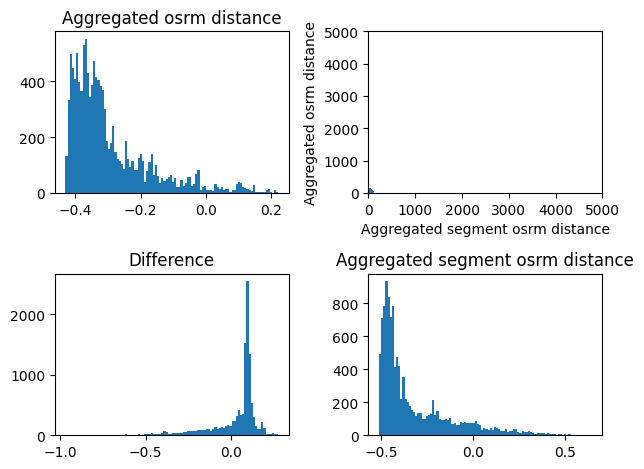

In [367]:
fig, ((ax0, ax1), (ax2,ax3)) = plt.subplots(nrows=2, ncols=2)

ax0.set_title('Aggregated osrm distance')
ax0.hist(ds_fullcols_processed.agg_osrm_distance,bins=100)

ax1.scatter(ds_fullcols_processed.agg_osrm_distance,ds_fullcols_processed.agg_segment_osrm_distance)
ax1.set_xlabel('Aggregated segment osrm distance')
ax1.set_ylabel('Aggregated osrm distance')
ax1.set_ylim([0,5000])
ax1.set_xlim([0,5000])

ax2.set_title('Difference')
ax2.hist(ds_fullcols_processed.agg_osrm_distance-ds_fullcols_processed.agg_segment_osrm_distance,bins=100)

ax3.set_title('Aggregated segment osrm distance')
ax3.hist(ds_fullcols_processed.agg_segment_osrm_distance,bins=100)


plt.tight_layout()

plt.show()

6. Business insights

In [368]:
print('Most travels are between following cities')
print(ds_forinsights[['s_place','d_place']].value_counts().head(10))

print('Distribution of trip times and distances in the busiest corridor')
print(ds_forinsights[(ds_forinsights['s_place']=='Bangalore') & 
(ds_forinsights['d_place']=='Bangalore')][['computed_min','agg_segment_osrm_distance']].describe())

#print('Most trave;s have started from following cities')
#print(ds_fullcols_processed['s_state'].value_counts().head(10))

print('Distribution of trip times');
print(ds_forinsights['computed_min'].describe())


Most travels are between following cities
s_place     d_place   
Bangalore   Bangalore     1355
Mumbai      Mumbai         599
Bhiwandi    Mumbai         435
Hyderabad   Hyderabad      366
Mumbai      Bhiwandi       270
Gurgaon     Delhi          235
Chennai     Chennai        201
MAA         Chennai        178
Chandigarh  Chandigarh     175
Delhi       Gurgaon        159
Name: count, dtype: int64
Distribution of trip times and distances in the busiest corridor
       computed_min  agg_segment_osrm_distance
count   1355.000000                1355.000000
mean      -0.298578                  -0.421805
std        0.181458                   0.078022
min       -0.621007                  -0.511880
25%       -0.433478                  -0.458694
50%       -0.330012                  -0.431397
75%       -0.203196                  -0.405352
max        0.531670                   0.234209
Distribution of trip times
count    12001.000000
mean        -0.302004
std          0.239630
min         -0.630

In [369]:
print(ds_forinsights['s_state'].value_counts().head(10))

s_state
Maharashtra       2131
Karnataka         1937
Haryana           1123
Tamil Nadu         817
Delhi              611
Telangana          600
Uttar Pradesh      571
West Bengal        516
Gujarat            486
Andhra Pradesh     371
Name: count, dtype: int64


In [370]:
ds_forinsights[ds_forinsights['computed_min']==np.max(ds_forinsights['computed_min'])][['s_place','d_place']]

,s_place,d_place
trip_uuid,,
trip-153752113186172740,Chandigarh,Ludhiana
